## Experiment : Running Gradient Boosting for the raw data 

The raw data has been encoded into 3 different versions to experiment with cateogorical feature encoding methods as the Grandient Boosting models, except XGBoost, handle categorical features. The dataframe has been encoded into 4 different ways:

**One-Hot Encoding for categorical features**

the dataframe has been encoded into 4 different ways:

- **0**: no One-Hot Encoding for categorical features, no use of cat_feaetures parameter
- **1**: no One-Hot Encoding for categorical features, use of cat_feaetures parameter
- **2**: get_dummies for categorical columns (only nominal) e.g) teaches_k
- **3**: get_dummies for categorical columns (nominal and ordinal) e.g) age_P


- All negative values such as -8 or -9 are encoded 0 meaning valid skip
- Run 4 different Gradient Boosting models, CatBoost, XGBoost, LightGBM and HistGradientBoosting, for SASS_cleaned_v4.csv specifying the indices of categorical features for models to handle them except XGBoost


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
# import warnings 
# warnings.filterwarnings("ignore")
from pandas import MultiIndex, Int16Dtype

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [3]:
df = pd.read_csv('../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
print(df.shape)

(3640, 128)


In [4]:
cols_old = ['CNTLNUM_T',
'SCHCNTL',
'F0195',
'F0196',
'F0197',
'FTPT_S',
'GENDER',
'AGE_T',
'RACETH_T',
'T0072',
'T0081',
'A0225',
'NEWTCH',
'RACETH_P',
'S0282',
'S0285',
'S0288',
'S0306',
'S0307',
'S0308',
'TOTEXPER',
'T0102',
'S1611',
'S1612',
'T0065',
'T0082',
'S1613',
'T0066',
'S1614',
'T0068',
'T0069',
'S1615',
'S1616',
'S1617',
'S1618',
'S1619',
'S1620',
'S1621',
'S1622',
'S1623',
'S1624',
'S1625',
'S1626',
'S1627',
'T0206',
'T0067',
'T0209',
'T0210',
'T0211',
'T0212',
'T0273',
'T0339',
'T0340',
'T0341',
'T0343',
'T0345',
'T0347',
'T0348',
'T0350',
'T0352',
'T0070',
'T0080',
'T0084',
'T0087',
'T0090',
'MINTCH',
'EARNALL',
'EARNSCH',
'T0093',
'T0104',
'STU_TCH',
'T0096',
'PGMTYPE',
'SCHLEVEL',
'MINENR',
'T0099',
'S0290',
'T0103',
'T0120',
'T0179',
'URBANIC',
'REGION',
'T0180',
'S0283',
'S0284',
'T0181',
'S0286',
'S0287',
'T0182',
'T0183',
'T0184',
'T0191',
'T0192',
'T0193',
'T0194',
'T0195',
'T0196',
'T0197',
'T0198',
'T0199',
'T0200',
'T0201',
'T0202',
'T0203',
'T0204',
'CNTLNUM_P',
'AGE_P',
'T0205',
'A0053',
'A0054',
'A0055',
'A0056',
'T0355',
'A0226',
'A0227',
'S0265',
'S0266',
'S0267',
'S0268',
'S0269',
'S0270',
'S0271',
'S0272',
'S0273',
'S0274',
'S0275',
'S0276']

cols_new = ['CNTLNUM_T',
'SCHCNTL',
'marital_status',
'num_dependents',
'dependents_age5',
'ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'total_tch_yr',
'field',
'incen_certification',
'incen_excellence',
'public_ft_exp',
'MA_grad_yr',
'incen_prof_dev',
'public_pt_exp',
'incen_location',
'private_ft_exp',
'private_pt_exp',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'hrs_tch_ELA',
'hrs_tch_math',
'hrs_tch_social',
'hrs_tch_science',
'hrs_in_school_wk',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'stu_tch_ratio',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'CNTLNUM_P',
'age_P',
'teaches_12th',
'yrs_P_this_sch',
'yrs_P_oth_schls',
'yrs_tch_before_P',
'yrs_tch_since_P',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [5]:
df.rename(columns=dict(zip(cols_old, cols_new)), inplace=True)

In [6]:
cols_cat= ['marital_status',
'ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'field',
'incen_certification',
'incen_excellence',
'MA_grad_yr',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'age_P',
'teaches_12th',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [7]:
cols_value_change = ['new_teacher',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'incen_certification',
'incen_excellence',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'private_exp',
'deg_T_BA',
'deg_T_MA',
'cert_holder',
'field_same',
'pd_release_time',
'pd_schedule_time',
'pd_stipend',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'union_member']

cols_dummies = ['marital_status',
'ft_pt_status',
'gender_T',
'race_T',
'BA_major',
'MA_major',
'field',
'class_org',
'cert_type',
'sch_type',
'level',
'urbanicity',
'region',
'gender_P',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'incen_certification',
'incen_excellence',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'private_exp',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'deg_T_EdS',
'deg_T_AdvGrad',
'deg_T_Phd',
'cert_holder',
'field_same',
'pd_release_time',
'pd_schedule_time',
'pd_stipend',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'teaches_12th',
'union_member']

cols_dummies_ord = ['age_T',
'MA_grad_yr',
'would_be_tch',
'remain_teaching',
'base_salary',
'minority_teachers',
'earnings_total',
'earnings_school',
'minority_students',
'title1_receive_stu',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'FRPL_approved_pk',
'FRPL_approved_k12',
'age_P',
'salary_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

**One-Hot Encoding for categorical features**

the dataframe has been encoded into 4 different ways:

- **0**: no One-Hot Encoding for categorical features, no use of cat_feaetures parameter
- **1**: no One-Hot Encoding for categorical features, use of cat_feaetures parameter
- **2**: get_dummies for categorical columns (only nominal)
- **3**: get_dummies for categorical columns (nominal and ordinal)

In [8]:
def encoding (df, ver):
    categorical_cols = []
    
    #marked as 0 for valid skipped answers
    for c in df.columns:
        if (df[c]<0).any(): df[c]=df[c].apply(lambda x: 0 if x < 0 else int(x))
    
    #marked as 0 for any False answers
    for c in cols_value_change:
        df[c] = df[c].apply(lambda x: 0 if x != 1 else x)
        
    if ver == 0: return df, categorical_cols  

    if ver == 1: return df, cols_cat
    
    df_temp = pd.get_dummies(df[cols_dummies], columns=cols_dummies)
    for c in df_temp: categorical_cols.append(c)
    df.drop(columns=cols_dummies, inplace=True)
    df=pd.concat([df, df_temp], axis=1)
    df=df.astype({c: 'int' for c in categorical_cols})
    
    if ver==2: return df, categorical_cols
    
    df_temp=pd.get_dummies(df[cols_dummies_ord], columns=cols_dummies_ord)
    for c in df_temp: categorical_cols.append(c)
    df.drop(columns=cols_dummies_ord, inplace=True)
    df=pd.concat([df, df_temp], axis=1)
    df=df.astype({c: 'int' for c in categorical_cols})
    
    return df, categorical_cols

**Split data**

In [9]:
random_state=123

In [10]:
def split_data (df):
    label = ['label']
    cols_drop = ['CNTLNUM_T', 'SCHCNTL', 'CNTLNUM_P']

    y = df[label].values.ravel()
    X = df.drop(columns=label + cols_drop).copy()
    columns = df.drop(columns=label + cols_drop).columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, columns

**n iteration for models**

In [11]:
def get_n_iter (param_grid):
    n_iter_denom = 4
    n_iter = 1
    for v in param_grid.values(): n_iter*=len(v)
    n_iter /= n_iter_denom

    return int(n_iter)

### Modeling

In [12]:
encoding_type=['No Enc, No Cat', 'No Enc, Cat', 'One-Hot Nom', 'One-Hot Nom-Ord']
rounds = 20

In [13]:
def model_report(estimator, param_grid, fit_params, name, enc_ver, categorical=False):
    result = pd.DataFrame()
    cv=5

    n_iter=get_n_iter(param_grid)
    print('{} n_iter: {:0.0f}'.format(name, n_iter))  

    df_copy, categorical_cols = encoding(df.copy(), enc_ver)
    X_train, X_test, y_train, y_test, columns = split_data(df_copy)    
    
    categorical_cols_idx = [columns.index(c) for c in categorical_cols]
    
    if categorical:
        if (name == 'LightGBM'): fit_params['categorical_feature']=categorical_cols_idx
        if (name == 'CatBoost'): fit_params['cat_features']=categorical_cols_idx
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': categorical_cols_idx})

    if not categorical or len(categorical_cols) == 0: 
        if (name == 'LightGBM'): fit_params['categorical_feature']=None
        if (name == 'CatBoost'): fit_params['cat_features']=None
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': None})

    grid = RandomizedSearchCV(estimator, param_distributions=param_grid, cv=cv, n_jobs=-1, 
                          random_state=random_state, n_iter=n_iter)

    start_cpu = time.process_time()
    start_wall = time.time()

    if name == 'CatBoost':
        fit_params['eval_set'] =  [(X_test, y_test)]
        grid.fit(X_train, y_train, **fit_params)            
    elif name == 'HistGB': 
        grid.fit(X_train, y_train)
    else:
        fit_params['eval_set'] =  [(X_test.values, y_test)]
        grid.fit(X_train.values, y_train, **fit_params)   
        
    cpu_time = time.process_time() - start_cpu
    wall_time = time.time() - start_wall
    
    y_pred = grid.best_estimator_.predict(X_test)
    temp = {'Model': name,
            'enc_ver': encoding_type[enc_ver],
            'n features': len(columns),
            'n cat_features': len(categorical_cols),
            'best_params': grid.best_params_,
            'Best Accuracy': grid.best_score_, 
            'Train Accuracy': grid.best_estimator_.score(X_train, y_train),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'MCC': matthews_corrcoef(y_test, y_pred), 
            'F1': f1_score(y_test, y_pred),
#                 'ROC': roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr', average=avg),
            'conf_mat': confusion_matrix(y_test, y_pred), 
            'Prediction': y_pred,
            'predict_proba': grid.best_estimator_.predict_proba(X_test),
#             'Features': features,
            'estimator': grid.best_estimator_,
            'classification_report': classification_report(y_test, y_pred),
            'Train Time CPU': cpu_time,
            'Train Time Wall': wall_time,
            'n_iter': n_iter}
    result = pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

In [14]:
results = pd.DataFrame()

**CatBoost**

In [15]:
%%time
from catboost import CatBoostClassifier

params = {'iterations': [50, 100, 200],
'depth': [3, 6, 9],
'min_data_in_leaf': [1, 5, 10],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg': [0, 0.01, 0.1, 1, 10],
'random_strength': [0, 5, 10, 15]}

fit_params = {'early_stopping_rounds': rounds}

estimator = CatBoostClassifier(random_seed=random_state, verbose=False, eval_metric="Logloss", 
                               one_hot_max_size=256)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'CatBoost', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

CatBoost n_iter: 540
CatBoost n_iter: 540
CatBoost n_iter: 540
CatBoost n_iter: 540
CPU times: total: 59.1 s
Wall time: 54min 18s


**XGBoost**

In [16]:
%%time
import xgboost

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, 0],
'min_child_weight': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'alpha': [0,  0.1, 10],
'lambda': [0,  0.1, 10],
'gamma': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds}
              # 'eval_metric': 'logloss'}

estimator = xgboost.XGBClassifier(seed=random_state, objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'XGBoost', i, False)
    results=pd.concat([results, result_report], ignore_index=True)

XGBoost n_iter: 972


C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-logloss:0.66463
[1]	validation_0-logloss:0.64560
[2]	validation_0-logloss:0.63050
[3]	validation_0-logloss:0.62174
[4]	validation_0-logloss:0.61198
[5]	validation_0-logloss:0.60324
[6]	validation_0-logloss:0.59832
[7]	validation_0-logloss:0.59243
[8]	validation_0-logloss:0.58403
[9]	validation_0-logloss:0.57831
[10]	validation_0-logloss:0.57291
[11]	validation_0-logloss:0.56915
[12]	validation_0-logloss:0.56573
[13]	validation_0-logloss:0.56188
[14]	validation_0-logloss:0.55654
[15]	validation_0-logloss:0.55412
[16]	validation_0-logloss:0.55141
[17]	validation_0-logloss:0.54956
[18]	validation_0-logloss:0.54564
[19]	validation_0-logloss:0.54363
[20]	validation_0-logloss:0.54164
[21]	validation_0-logloss:0.54013
[22]	validation_0-logloss:0.53840
[23]	validation_0-logloss:0.53702
[24]	validation_0-logloss:0.53667
[25]	validation_0-logloss:0.53586
[26]	validation_0-logloss:0.53508
[27]	validation_0-logloss:0.53349
[28]	validation_0-logloss:0.53254
[29]	validation_0-loglos

[39]	validation_0-logloss:0.52294
[40]	validation_0-logloss:0.52297
[41]	validation_0-logloss:0.52297
[42]	validation_0-logloss:0.52221
[43]	validation_0-logloss:0.52140
[44]	validation_0-logloss:0.52092
[45]	validation_0-logloss:0.52064
[46]	validation_0-logloss:0.52069
[47]	validation_0-logloss:0.52007
[48]	validation_0-logloss:0.51996
[49]	validation_0-logloss:0.51939
[50]	validation_0-logloss:0.51943
[51]	validation_0-logloss:0.51888
[52]	validation_0-logloss:0.51829
[53]	validation_0-logloss:0.51863
[54]	validation_0-logloss:0.51871
[55]	validation_0-logloss:0.51734
[56]	validation_0-logloss:0.51714
[57]	validation_0-logloss:0.51714
[58]	validation_0-logloss:0.51657
[59]	validation_0-logloss:0.51669
[60]	validation_0-logloss:0.51649
[61]	validation_0-logloss:0.51637
[62]	validation_0-logloss:0.51599
[63]	validation_0-logloss:0.51533
[64]	validation_0-logloss:0.51531
[65]	validation_0-logloss:0.51507
[66]	validation_0-logloss:0.51462
[67]	validation_0-logloss:0.51462
[68]	validatio

[27]	validation_0-logloss:0.49139
[28]	validation_0-logloss:0.49071
[29]	validation_0-logloss:0.49157
[30]	validation_0-logloss:0.49057
[31]	validation_0-logloss:0.49020
[32]	validation_0-logloss:0.48997
[33]	validation_0-logloss:0.48881
[34]	validation_0-logloss:0.48933
[35]	validation_0-logloss:0.48942
[36]	validation_0-logloss:0.48890
[37]	validation_0-logloss:0.48865
[38]	validation_0-logloss:0.48865
[39]	validation_0-logloss:0.48865
[40]	validation_0-logloss:0.48865
[41]	validation_0-logloss:0.48865
[42]	validation_0-logloss:0.48865
[43]	validation_0-logloss:0.48865
[44]	validation_0-logloss:0.48865
[45]	validation_0-logloss:0.48865
[46]	validation_0-logloss:0.48865
[47]	validation_0-logloss:0.48865
[48]	validation_0-logloss:0.48865
[49]	validation_0-logloss:0.48865
[50]	validation_0-logloss:0.48865
[51]	validation_0-logloss:0.48865
[52]	validation_0-logloss:0.48865
[53]	validation_0-logloss:0.48865
[54]	validation_0-logloss:0.48865
[55]	validation_0-logloss:0.48865
[56]	validatio

**LightGBM**

In [17]:
%%time
import lightgbm as lgb

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, -1],
'min_sum_hessian_in_leaf': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'reg_alpha': [0,  0.1, 10],
'reg_lambda': [0,  0.1, 10],
'min_split_gain': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds}

estimator = lgb.LGBMClassifier(random_state=random_state, objective="binary", metric="binary_logloss", verbosity=-1, silent=True, force_col_wise=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'LightGBM', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

LightGBM n_iter: 972
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's binary_logloss: 0.614065
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.580349
[3]	valid_0's binary_logloss: 0.561602
[4]	valid_0's binary_logloss: 0.54992
[5]	valid_0's binary_logloss: 0.539877
[6]	valid_0's binary_logloss: 0.529345
[7]	valid_0's binary_logloss: 0.521294
[8]	valid_0's binary_logloss: 0.517662
[9]	valid_0's binary_logloss: 0.513923
[10]	valid_0's binary_logloss: 0.510437
[11]	valid_0's binary_logloss: 0.505867
[12]	valid_0's binary_logloss: 0.504008
[13]	valid_0's binary_logloss: 0.503987
[14]	valid_0's binary_logloss: 0.504857
[15]	valid_0's binary_logloss: 0.503638
[16]	valid_0's binary_logloss: 0.503007
[17]	valid_0's binary_logloss: 0.502419
[18]	valid_0's binary_logloss: 0.502493
[19]	valid_0's binary_logloss: 0.501807
[20]	valid_0's binary_logloss: 0

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 3, 4, 5, 6, 7, 8, 9, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120, 121, 122, 123]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_war

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's binary_logloss: 0.652684
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.633473
[3]	valid_0's binary_logloss: 0.6173
[4]	valid_0's binary_logloss: 0.60341
[5]	valid_0's binary_logloss: 0.591279
[6]	valid_0's binary_logloss: 0.580916
[7]	valid_0's binary_logloss: 0.571251
[8]	valid_0's binary_logloss: 0.562569
[9]	valid_0's binary_logloss: 0.555515
[10]	valid_0's binary_logloss: 0.54895
[11]	valid_0's binary_logloss: 0.543329
[12]	valid_0's binary_logloss: 0.537093
[13]	valid_0's binary_logloss: 0.53326
[14]	valid_0's binary_logloss: 0.528714
[15]	valid_0's binary_logloss: 0.524655
[16]	valid_0's binary_logloss: 0.521628
[17]	valid_0's binary_logloss: 0.518425
[18]	valid_0's binary_logloss: 0.514496
[19]	valid_0's binary_logloss: 0.513109
[20]	valid_0's binary_logloss: 0.510529
[21]	valid_0's bi

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[1]	valid_0's binary_logloss: 0.632318
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.600906
[3]	valid_0's binary_logloss: 0.580927
[4]	valid_0's binary_logloss: 0.566727
[5]	valid_0's binary_logloss: 0.55467
[6]	valid_0's binary_logloss: 0.545091
[7]	valid_0's binary_logloss: 0.53747
[8]	valid_0's binary_logloss: 0.531439
[9]	valid_0's binary_logloss: 0.527878
[10]	valid_0's binary_logloss: 0.523266
[11]	valid_0's binary_logloss: 0.518634
[12]	valid_0's binary_logloss: 0.516799
[13]	valid_0's binary_logloss: 0.514399
[14]	valid_0's binary_logloss: 0.510937
[15]	valid_0's binary_logloss: 0.508689
[16]	valid_0's binary_logloss: 0.505312
[17]	valid_0's binary_logloss: 0.504276
[18]	valid_0's binary_logloss: 0.502987
[19]	valid_0's binary_logloss: 0.502142
[20]	valid_0's binary_logloss: 0.499802
[21]	valid_0's

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 1

**HistGradientBoosting**

In [18]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

params = {'max_iter': [50, 100, 200],
'max_depth': [1, 6, None],
'max_leaf_nodes': [10, 31, 50, 64],
'min_samples_leaf': [10, 20, 30],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_regularization': [0, 0.01, 0.1, 1, 10]}

fit_params = {}

estimator=HistGradientBoostingClassifier(random_state=random_state, n_iter_no_change=rounds, early_stopping=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'HistGB', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

HistGB n_iter: 540
HistGB n_iter: 540
HistGB n_iter: 540
HistGB n_iter: 540
CPU times: total: 2min 59s
Wall time: 2h 4min 51s


In [19]:
results.to_csv('Task6_NA_Modeling_GB.csv', index=False)

## Result ##

In [20]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)[['Model', 'enc_ver', 'n features', 'n cat_features', 'Test Accuracy', 'Precision', 'Recall', 'MCC', 'F1', 'best_params']]

,Model,enc_ver,n features,n cat_features,Test Accuracy,Precision,Recall,MCC,F1,best_params
3,CatBoost,One-Hot Nom-Ord,566,543,0.782967,0.782077,0.882759,0.541668,0.829374,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."
1,CatBoost,"No Enc, Cat",124,107,0.778846,0.774000,0.889655,0.532902,0.827807,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."
6,XGBoost,One-Hot Nom,435,384,0.777473,0.782609,0.868966,0.529915,0.823529,"{'n_estimators': 50, 'min_child_weight': 1, 'm..."
0,CatBoost,"No Enc, No Cat",124,0,0.774725,0.772636,0.882759,0.523760,0.824034,"{'random_strength': 5, 'min_data_in_leaf': 5, ..."
14,HistGB,One-Hot Nom,435,384,0.773352,0.781250,0.862069,0.521207,0.819672,"{'min_samples_leaf': 30, 'max_leaf_nodes': 64,..."
7,XGBoost,One-Hot Nom-Ord,566,543,0.771978,0.779626,0.862069,0.518183,0.818777,"{'n_estimators': 100, 'min_child_weight': 1, '..."
9,LightGBM,"No Enc, Cat",124,107,0.769231,0.770791,0.873563,0.511741,0.818966,"{'reg_lambda': 10, 'reg_alpha': 0, 'n_estimato..."
10,LightGBM,One-Hot Nom,435,384,0.766484,0.775468,0.857471,0.506351,0.814410,"{'reg_lambda': 0, 'reg_alpha': 10, 'n_estimato..."
11,LightGBM,One-Hot Nom-Ord,566,543,0.766484,0.775468,0.857471,0.506351,0.814410,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima..."
2,CatBoost,One-Hot Nom,435,384,0.766484,0.769857,0.868966,0.505802,0.816415,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."


**Accuracy, MCC and F1 Score**

In [21]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'enc_ver'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
results2['Encoding Type']=results2['enc_ver'].apply(lambda x: 'Type '+str(encoding_type.index(x)))

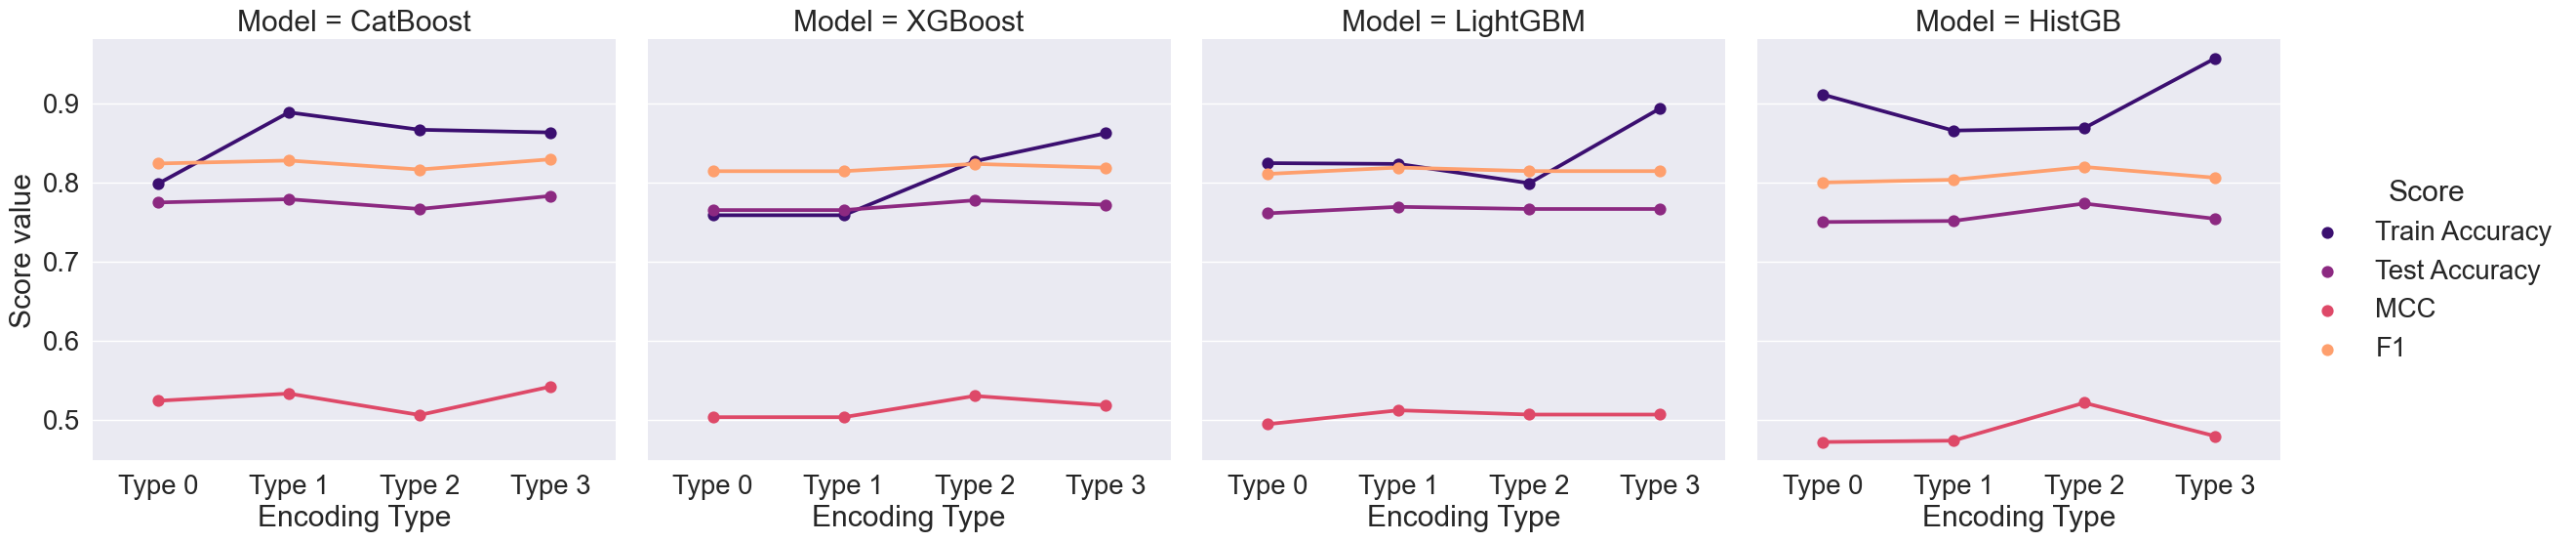

In [22]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="Encoding Type", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=1,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [23]:
models = results['Model'].unique().tolist()
temp=results.sort_values(by=['Model', 'MCC', 'F1'], ascending=False)

n=len(encoding_type)
best_per_model_idx = []
for i in range(len(temp.index)):
    if i % n == 0: best_per_model_idx.append(temp.index[i])

**Confusion Matrix**

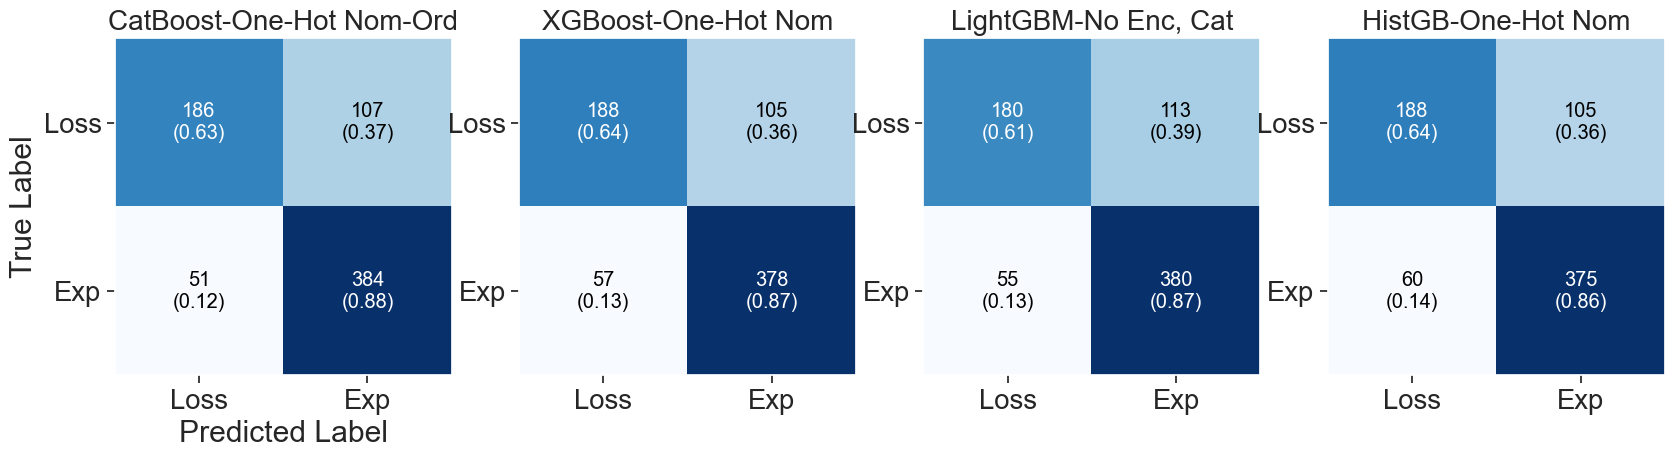

In [24]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

def ticks(x, position):
    if position == 1: return 'Loss'
    if position == 2: return 'Exp'
    if position == 3: return 'Gain'
    
fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'],
                          show_absolute=True, show_normed=True)
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(ticks))
    axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(ticks))
plt.show()

**Precision/Recall, ROC Curve**

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

fig, axes=plt.subplots(1,2, figsize=(20,10))

for idx in sorted(best_per_model_idx):
    prec, rec, thr = precision_recall_curve(y_test, results.loc[idx, 'Prediction'])
    axes[0].plot(prec, rec, label=results.loc[idx, 'Model'])
axes[0].set(title='Precision-Recall Curve - 4 models', xlabel='Precision', ylabel='Recall')
axes[0].legend(loc="best")

for idx in sorted(best_per_model_idx):
    fpr, tpr, thr = roc_curve(y_test, results.loc[idx, 'Prediction'])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=results.loc[idx, 'Model']+' (AUC={:0.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], 'k--', label='Random guess')
axes[1].set(title='ROC Curve - 4 models', xlabel='False Postive Rate', ylabel='True Positive Rate')
axes[1].legend(loc="best")

plt.show()

NameError: name 'y_test' is not defined